## Кроо Дмитрий, 824 группа.

### Задача 1 - Анализ данных  
Предскажите число заражений COVID-19 в США к 16.04.


In [1]:
import pandas as pd
import numpy as np
import plotly as plo
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('us-counties.csv')

Посмотрим на данные.

In [3]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
df.tail()

,date,county,state,fips,cases,deaths
53843,2020-04-12,Sublette,Wyoming,56035.0,1,0
53844,2020-04-12,Sweetwater,Wyoming,56037.0,7,0
53845,2020-04-12,Teton,Wyoming,56039.0,56,0
53846,2020-04-12,Uinta,Wyoming,56041.0,4,0
53847,2020-04-12,Washakie,Wyoming,56043.0,4,0


In [5]:
df.describe()

,fips,cases,deaths
count,53132.000000,53848.000000,53848.000000
mean,29529.152036,106.149328,3.178985
std,15549.107764,1336.965313,65.751445
min,1001.000000,0.000000,0.000000
25%,17161.000000,2.000000,0.000000
50%,28135.000000,5.000000,0.000000
75%,42125.000000,22.000000,1.000000
max,56043.000000,103208.000000,6717.000000


In [7]:
df[df['state'] == 'Alabama'].head()

,date,county,state,fips,cases,deaths
1619,2020-03-13,Elmore,Alabama,1051.0,1,0
1620,2020-03-13,Jefferson,Alabama,1073.0,2,0
1621,2020-03-13,Limestone,Alabama,1083.0,1,0
1622,2020-03-13,Montgomery,Alabama,1101.0,1,0
1623,2020-03-13,Tuscaloosa,Alabama,1125.0,1,0


Избавимся от того, что не сможем обработать т.к. на задачу 3 часа...

In [8]:
df_noc = df.drop(['county', 'fips'], axis=1)

In [9]:
states_data = dict.fromkeys(set(df['state']))

In [17]:
states = list(set(df['state']))

In [18]:
for c in states:
    states_data[c] = df_noc[df_noc['state'] == c]
    states_data[c]['cases_cumsum'] = np.cumsum(states_data[c]['cases'])
    states_data[c]['deaths_cumsum'] = np.cumsum(states_data[c]['deaths'])

C:\Users\dmitrykroo\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\dmitrykroo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Проверим, что данные актуальны во всех штатах.

In [30]:
print(set([list(states_data[d].date)[-1] for d in states]))

set(['2020-04-12', Timestamp('2020-04-12 00:00:00')])


Всё ок.
Сгруппируем данные по дням.

In [31]:
states_data_grouped = dict.fromkeys(set(df['state']))    

In [32]:
for k in states:
    states_data_grouped[k] = states_data[k].set_index(pd.to_datetime(states_data[k]['date'])).resample('D').sum()
    states_data_grouped[k].drop(['cases_cumsum', 'deaths_cumsum'], axis=1, inplace=True)

Посмотрим как выглядят последние 15 дней:

C:\Users\dmitrykroo\Anaconda2\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



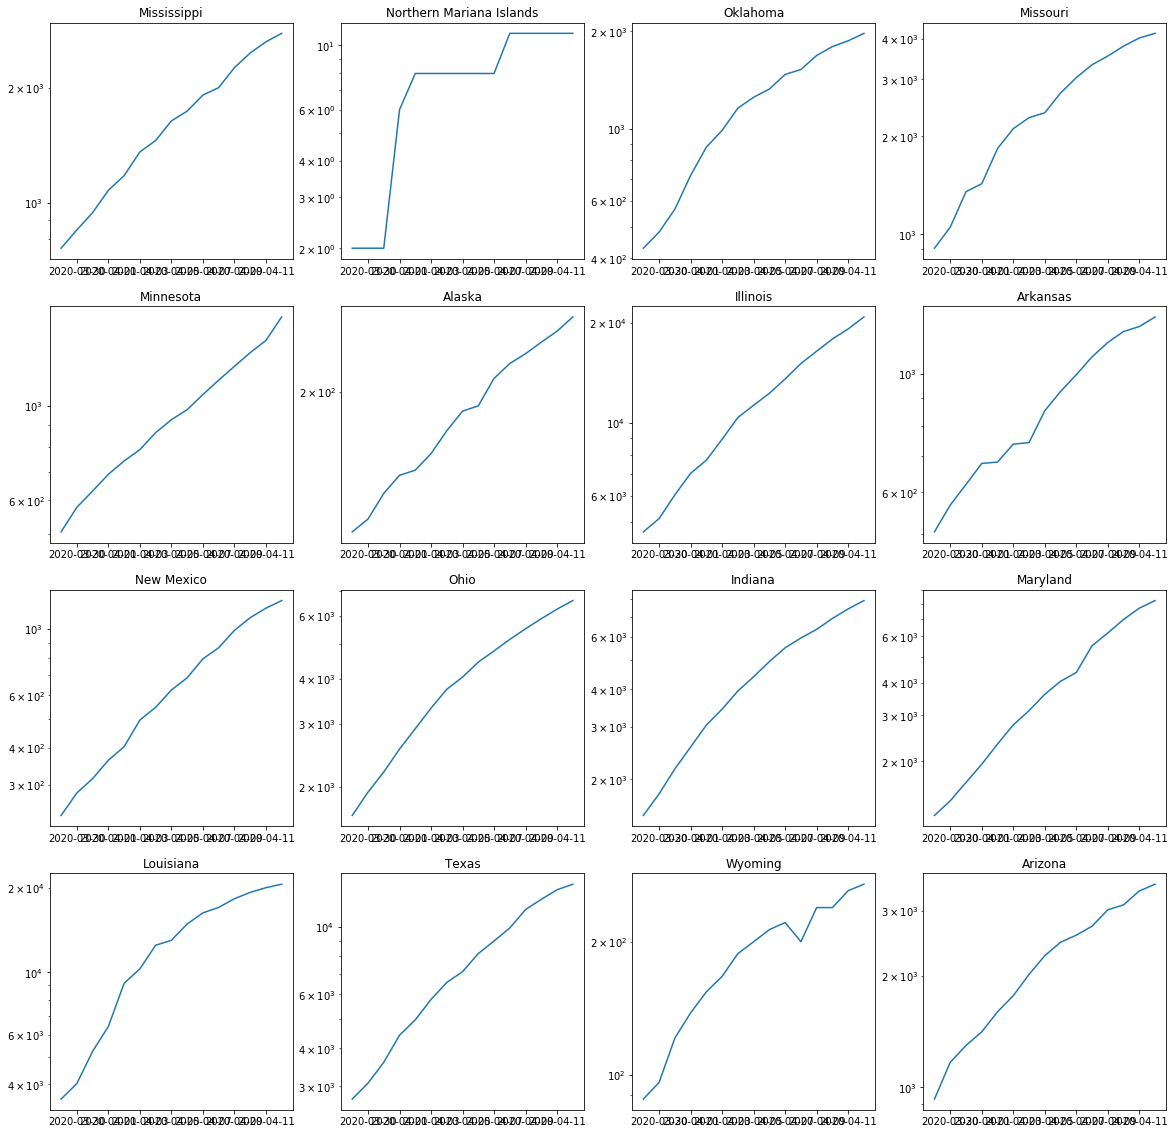

In [33]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))


for i, k in enumerate(states):
    if i > 15: 
        break
    axes[i/4, i%4].plot(states_data_grouped[k][-15:].index, 
                        states_data_grouped[k][-15:]['cases'])
    axes[i/4, i%4].set_yscale('log')
    axes[i/4, i%4].set_title(k)


plt.show()

Графики ближе к концу загибаются. Курс матана научил, что стоит попробовать приблизить квадратичным многочленом (учитывая, что спрогнозировать надо всего на 4 дня вперёд). Попробуем. Возьмём данные за последние 10 дней и построим простую модель.

In [37]:
test_data = np.log(np.array(states_data_grouped['Hawaii'][-10:]['cases']))

In [38]:
coefs = np.polyfit(np.arange(0, 10), test_data, 2)

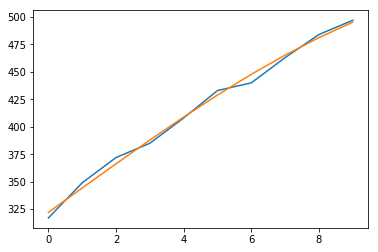

In [39]:
x = np.linspace(0, 9, 10)

plt.plot(x, np.e**test_data)
plt.plot(np.arange(0, 10), np.e**(x**2 * coefs[0] + x * coefs[1] + coefs[2]))

plt.show()

Выглядит ничего так. Построим такие графики для всех штатов, благо их немного. 

Часть 1:

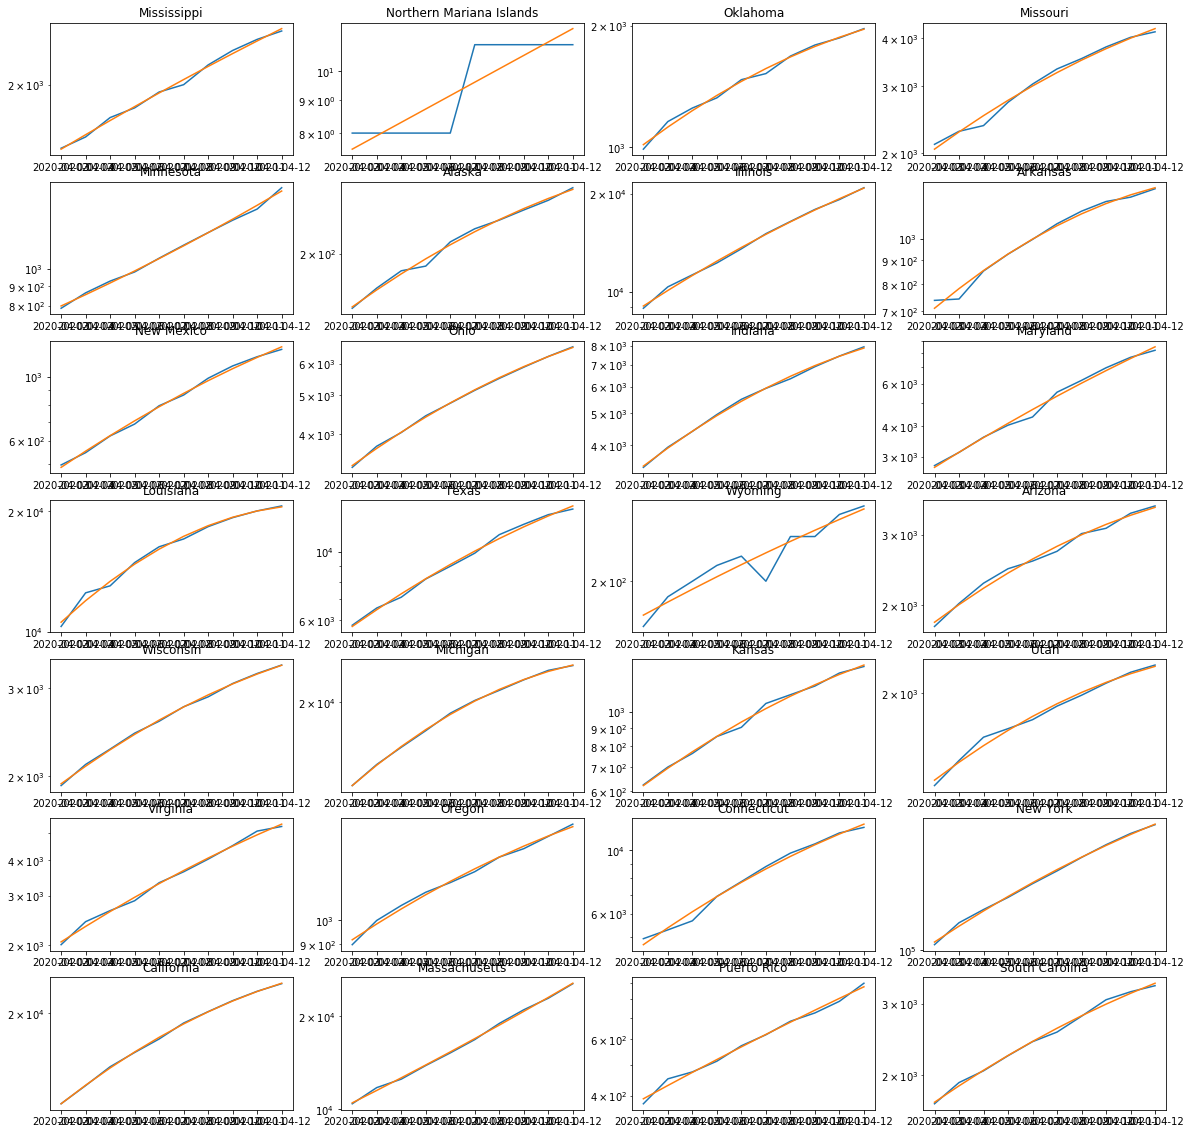

In [208]:
z = 10

fig, axes = plt.subplots(7, 4, figsize=(20, 20))
x = np.linspace(0, z-1, z)

for i, k in enumerate(states[:28]):
    test_data = np.log(np.array(states_data_grouped[k][-z:]['cases']))
    coefs = np.polyfit(np.arange(0, z), test_data, 2)
    axes[i/4, i%4].plot(states_data_grouped[k][-z:].index, states_data_grouped[k][-z:]['cases'])
    axes[i/4, i%4].plot(states_data_grouped[k][-z:].index, np.e**(x**2 * coefs[0] + x * coefs[1] + coefs[2]))
    axes[i/4, i%4].set_yscale('log')
    axes[i/4, i%4].set_title(k)


plt.show()

Часть два:

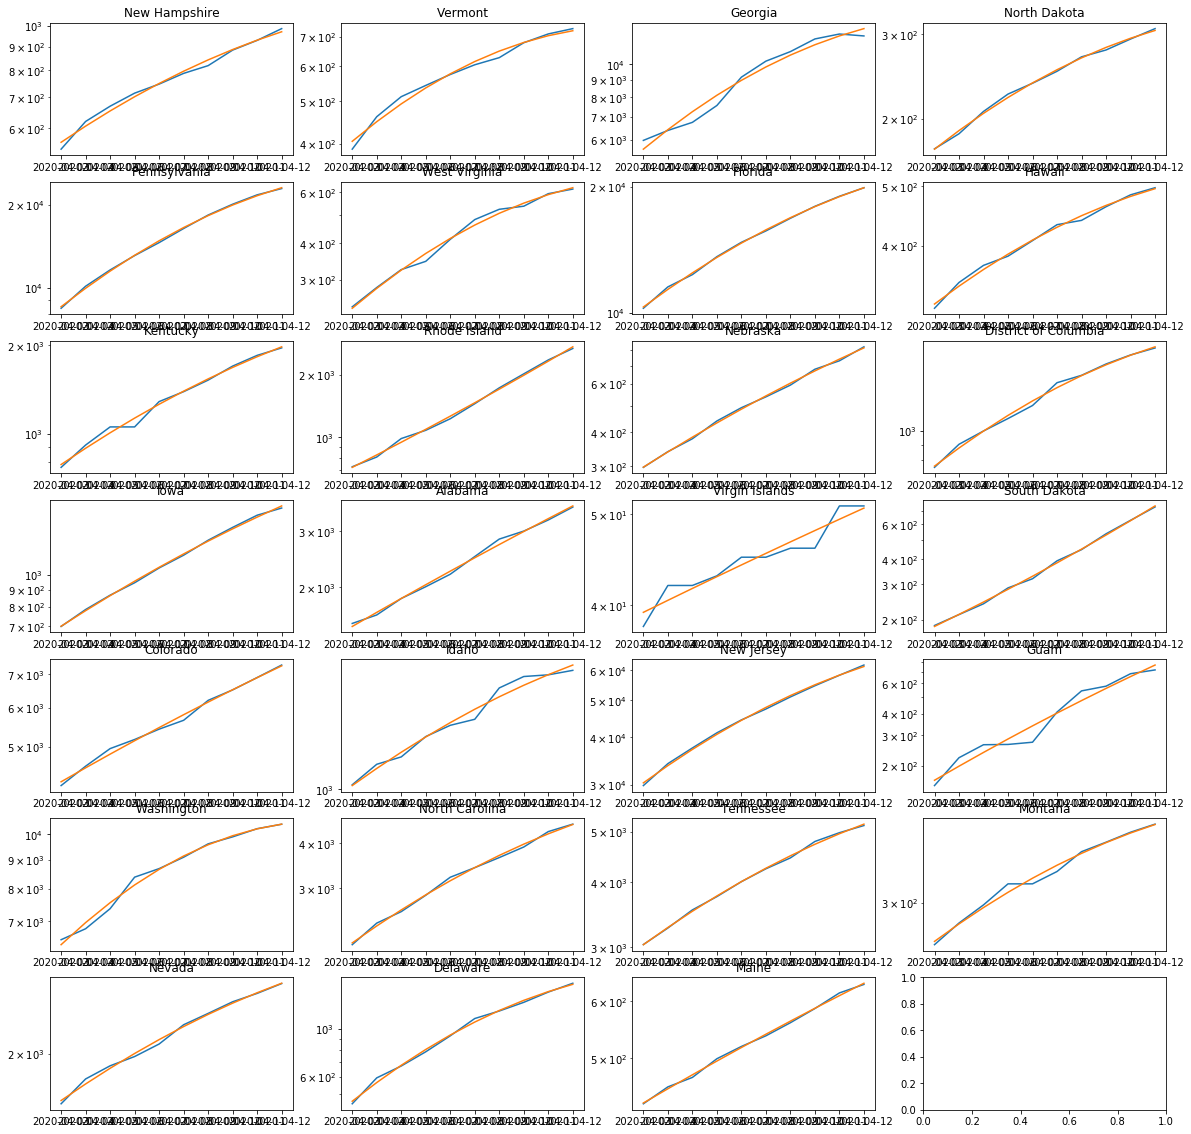

In [210]:
z = 10

fig, axes = plt.subplots(7, 4, figsize=(20, 20))
x = np.linspace(0, z-1, z)

for i, k in enumerate(states[28:]):
    test_data = np.log(np.array(states_data_grouped[k][-z:]['cases']))
    coefs = np.polyfit(np.arange(0, z), test_data, 2)
    axes[i/4, i%4].plot(states_data_grouped[k][-z:].index, states_data_grouped[k][-z:]['cases'])
    axes[i/4, i%4].plot(states_data_grouped[k][-z:].index, np.e**(x**2 * coefs[0] + x * coefs[1] + coefs[2]))
    axes[i/4, i%4].set_yscale('log')
    axes[i/4, i%4].set_title(k)


plt.show()

Мы видим, что Idaho и Virgin Islands имеют структуру, которая плохо приближается многочленом 2 степени. Для простоты посчитаем, что они растут по экспоненте (т.е. логарифм приближается прямой).

Но в целом красиво приближает. Посчитаем прогноз.

In [40]:
def get_prediction(days=10, forward=4, degree=2):
    res = 0
    linear_states = ['Idaho', 'Virgin_Islands']
    for k in states:
        deg = 1 if k in linear_states else degree
        test_data = np.log(np.array(states_data_grouped[k][-days:]['cases']))
        coefs = np.polyfit(np.arange(0, days), test_data, deg)        
        res += np.e**(np.sum(np.flip((days + forward - 1)**np.arange(0, deg + 1)) * coefs))
        
    return res

In [41]:
get_prediction()

666942.1771318438

Посмотрим, что будет, если строить прогноз не за последние 10 дней, а за 12 или 7. 

In [42]:
get_prediction(days=12)

639176.6541698594

In [43]:
get_prediction(days=7)

656245.5948358343

В целом оценки похожи.

Но что, если количество заражённых будет расти по экспоненте?
Посмотрим на приближения:

In [44]:
get_prediction(days=10, degree=1)

790160.7850028131

In [45]:
get_prediction(days=12, degree=1)

838104.2500864066

In [222]:
get_prediction(days=7, degree=1)

753845.9328641249

Первая оценка кажется мне наиболее соответствующей здравому смыслу.

Итого, 16 апреля в США будет примерно
 # 666 
 тысяч заражённых.

~~Ещё одно доказательство, что это филиал ада~~